##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **MODEL TRAINING WITH THE CIFAR-10 DATASET**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Training on the CIFAR-10 and Jena Climate datasets to achieve better performance, with higher accuracy and lower loss.

#### 🔎 Data inspection

In [21]:
#import used pakages and datasets
from tensorflow import keras
from  keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

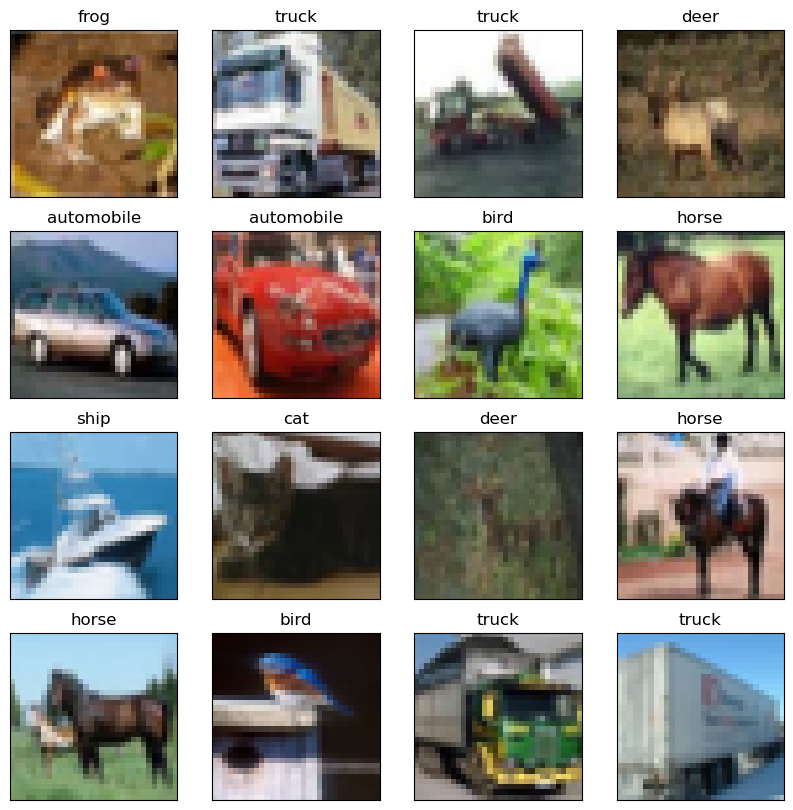

In [4]:
#General overwiew of the dataset
import matplotlib.pyplot as plt

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

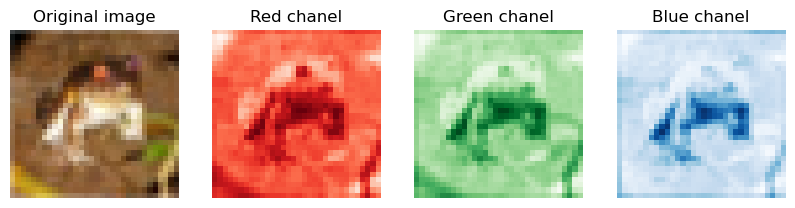

In [5]:
#Visualizing the chanels of the image
image = x_train[0]
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(R, cmap='Reds')
plt.title('Red chanel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(G, cmap='Greens')
plt.title('Green chanel')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(B, cmap='Blues')
plt.title('Blue chanel')
plt.axis('off')

In [6]:
from keras import layers
inputs = keras.Input(shape=(32,32,3))
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_cifar1 = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_cifar10.keras',
        save_best_only = True,
        monitor = 'val_loss'
    )]


model_cifar1.compile(optimizer='rmsprop',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
history_cifar1 = model_cifar1.fit(x_train, y_train, 
                                  epochs=30, 
                                  validation_data=(x_val,y_val),
                                  callbacks=callbacks)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4577 - loss: 1.5569 - val_accuracy: 0.5267 - val_loss: 1.3586
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5685 - loss: 1.2305 - val_accuracy: 0.5562 - val_loss: 1.2663
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6209 - loss: 1.0822 - val_accuracy: 0.6020 - val_loss: 1.1521
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6640 - loss: 0.9664 - val_accuracy: 0.6043 - val_loss: 1.1574
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6976 - loss: 0.8695 - val_accuracy: 0.6250 - val_loss: 1.1559
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7268 - loss: 0.7866 - val_accuracy: 0.6094 - val_loss: 1.2152
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7500 - loss: 0.7075 - val_accuracy: 0.6139 - val_loss: 1.2914
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7749 - loss

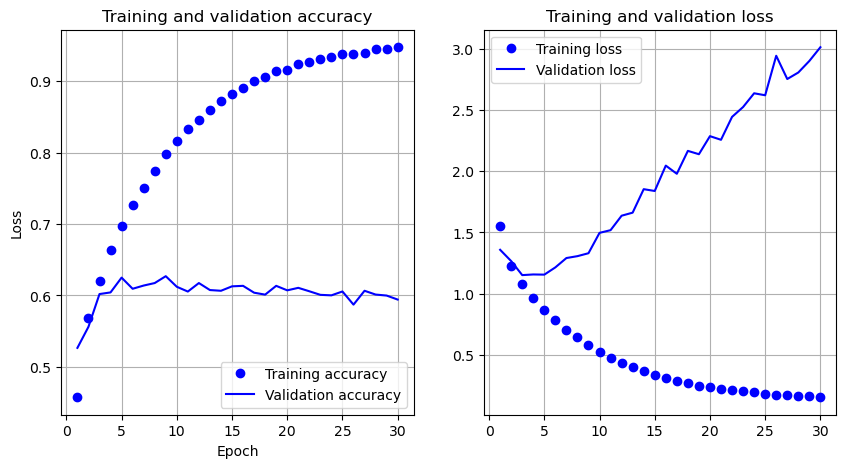

In [9]:
accuracy_cifar1 = history_cifar1.history['accuracy']
val_accuracy_cifar1 = history_cifar1.history['val_accuracy']
loss_cifar1 = history_cifar1.history['loss']
val_loss_cifar1 = history_cifar1.history['val_loss']
epochs = range(1, len(val_accuracy_cifar1) + 1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(epochs, accuracy_cifar1, 'bo', label='Training accuracy')
ax1.plot(epochs, val_accuracy_cifar1, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, loss_cifar1, 'bo', label='Training loss')
ax2.plot(epochs, val_loss_cifar1, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

In [10]:
test_model = keras.models.load_model('convnet_cifar10.keras')
test_loss, test_acc = test_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6004 - loss: 1.1539
Test accuracy: 0.600


There is a clear problem of overfitting with the training accuracy reaching 95% while the validation accuracy drops to 64%. The same pattern is observed with the loss: after reaching a low point around the fifth epoch, it increases rapidly, which is a clear sign of overfitting. To reduce the overfitting thecniques like dropout could be used to reduce this.

In [ ]:
from keras import layers, models

inputs = keras.Input(shape=(32,32,3))

x = layers.Rescaling(1./255)(inputs) 

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(10, activation='softmax')(x)

model_cifar2 = keras.Model(inputs=inputs, outputs=outputs)

model_cifar2.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_cifar2.keras',
        save_best_only=True,
        monitor='val_loss'
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=12, restore_best_weights=True
    ),

]
history_cifar2 = model_cifar2.fit(x_train, y_train,
                           epochs=40,
                           validation_data=(x_val, y_val),
                           callbacks=callbacks)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7308 - loss: 0.7861 - val_accuracy: 0.6518 - val_loss: 1.0865
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 55ms/step - accuracy: 0.7610 - loss: 0.6972 - val_accuracy: 0.8205 - val_loss: 0.5199
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.7864 - loss: 0.6346 - val_accuracy: 0.8261 - val_loss: 0.5023
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.8020 - loss: 0.5815 - val_accuracy: 0.8440 - val_loss: 0.4545
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.8150 - loss: 0.5448 - val_accuracy: 0.8718 - val_loss: 0.3717
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.8253 - loss: 0.5143 - val_accuracy: 0.8026 - val_loss: 0.5705
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.8355 - loss: 0.4864 - val_accuracy: 0.8825 - val_loss: 0.3434
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.8452 

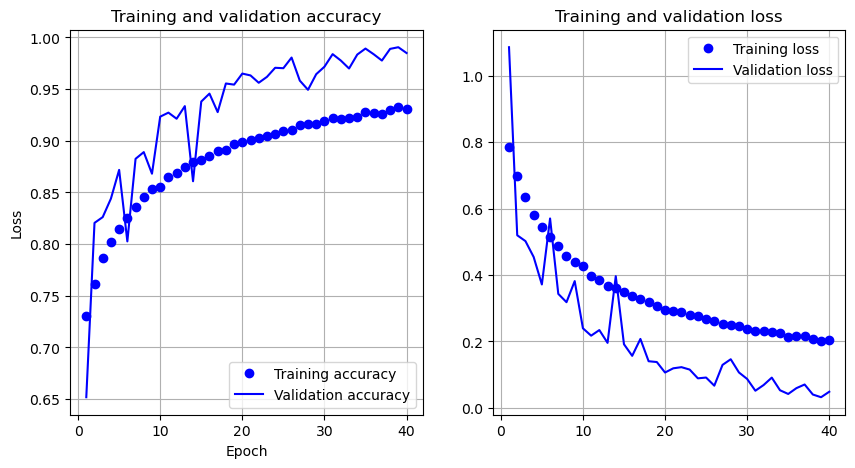

In [ ]:
accuracy_cifar2 = history_cifar2.history['accuracy']
val_accuracy_cifar2 = history_cifar2.history['val_accuracy']
loss_cifar2 = history_cifar2.history['loss']
val_loss_cifar2 = history_cifar2.history['val_loss']
epochs = range(1, len(val_accuracy_cifar2) + 1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(epochs, accuracy_cifar2, 'bo', label='Training accuracy')
ax1.plot(epochs, val_accuracy_cifar2, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, loss_cifar2, 'bo', label='Training loss')
ax2.plot(epochs, val_loss_cifar2, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show() 

In [38]:
test_model2 = keras.models.load_model(
    'convnet_cifar2.keras')
test_loss2, test_acc2 = test_model2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc2:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8608 - loss: 0.5106
Test accuracy: 0.861


In this new architecture, two consecutive convolutional layers are used before each pooling operation. This allows the network to learn richer and more complex features at every level.  
Batch Normalization helps stabilize training by reducing internal covariate shift, resulting in faster and more stable learning.  
To reduce overfitting, Dropout is applied in strategic locations after each convolutional block and after the dense layer preventing the network from relying too heavily on specific neurons.